# Exercici 1

Agrupa els vols utilitzant l'algorisme de K-means.

Group the flights using the K-means algorithm.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("DelayedFlights.csv", index_col = 0)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


The data consists of flight arrival and departure details for all commercial flights within the USA. Variable descriptions:
* 1 Year; 2008 
* 2 Month; 1-12 
* 3 DayofMonth; 1-31 
* 4 DayOfWeek; 1 (Monday) - 7 (Sunday) 
* 5 DepTime; actual departure time (local, hhmm) 
* 6 CRSDepTime; scheduled departure time (local, hhmm) 
* 7 ArrTime; actual arrival time (local, hhmm) 
* 8 CRSArrTime; scheduled arrival time (local, hhmm) 
* 9 UniqueCarrier; unique carrier code 
* 10 FlightNum; flight number 
* 11 TailNum; plane tail number 
* 12 ActualElapsedTime; in minutes 
* 13 CRSElapsedTime; in minutes 
* 14 AirTime; in minutes 
* 15 ArrDelay; arrival delay, in minutes 
* 16 DepDelay; departure delay, in minutes 
* 17 Origin; origin IATA airport code 
* 18 Dest; destination IATA airport code 
* 19 Distance; in miles 
* 20 TaxiIn; taxi in time, in minutes 
* 21 TaxiOut; taxi out time in minutes 
* 22 Cancelled; was the flight cancelled? 
* 23 CancellationCode; reason for cancellation (A = carrier, B = weather, C = NAS, D = security) 
* 24 Diverted; 1 = yes, 0 = no 
* 25 CarrierDelay; in minutes 
* 26 WeatherDelay; in minutes 
* 27 NASDelay; in minutes 
* 28 SecurityDelay; in minutes 
* 29 LateAircraftDelay; in minutes

We are first deleting some columns that are not needed. The Year column, that is always 2008; the Cancelled column, as well as the rows that have cancelled = 1, because those are of no interest if we are studying delay; the CancellationCode column, for the same reasons; the Diverted column, as well as the rows that have diverted = 1, because those are of no interest if we are studying delay; and the Origin and Dest because they add no real information that the column Distance doesn't provide, as well as the TailNum column.

In [3]:
#remove the Year column
df = df.drop(["Year"], axis = 1)

#keep only rows that were not cancelled
df = df[df.Cancelled == 0]

#remove the Cancelled row
df = df.drop(["Cancelled"], axis = 1)

#remove CancellationCode column
df = df.drop(["CancellationCode"], axis = 1)

#keep only rows that were not diverted
df = df[df.Diverted == 0]

#remove the Diverted row
df = df.drop(["Diverted"], axis = 1)

#remove the Origin, Dest, and TailNum row
df = df.drop(["Origin", "Dest", "TailNum"], axis = 1)

df.head()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,...,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1,3,4,2003.0,1955,2211.0,2225,WN,335,128.0,...,-14.0,8.0,810,4.0,8.0,NaN,NaN,NaN,NaN,NaN
1,1,3,4,754.0,735,1002.0,1000,WN,3231,128.0,...,2.0,19.0,810,5.0,10.0,NaN,NaN,NaN,NaN,NaN
2,1,3,4,628.0,620,804.0,750,WN,448,96.0,...,14.0,8.0,515,3.0,17.0,NaN,NaN,NaN,NaN,NaN
4,1,3,4,1829.0,1755,1959.0,1925,WN,3920,90.0,...,34.0,34.0,515,3.0,10.0,2.0,0.0,0.0,0.0,32.0
5,1,3,4,1940.0,1915,2121.0,2110,WN,378,101.0,...,11.0,25.0,688,4.0,10.0,NaN,NaN,NaN,NaN,NaN


We are now going to take care of the NaN values as well.

In [4]:
df.isna().sum()

Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                   0
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
ActualElapsedTime         0
CRSElapsedTime            0
AirTime                   0
ArrDelay                  0
DepDelay                  0
Distance                  0
TaxiIn                    0
TaxiOut                   0
CarrierDelay         680883
WeatherDelay         680883
NASDelay             680883
SecurityDelay        680883
LateAircraftDelay    680883
dtype: int64

The large number of NaN values coincide with an arrival delay of 15 or less, as those atributes were only filled in when there was a greater delay than that. Hence, the best option we have is to fill those NaN with 0.

In [4]:
#filling NaN values in these columns with their median
df["CarrierDelay"] = df["CarrierDelay"].fillna(0)
df["WeatherDelay"] = df["WeatherDelay"].fillna(0)
df["NASDelay"] = df["NASDelay"].fillna(0)
df["SecurityDelay"] = df["SecurityDelay"].fillna(0)
df["LateAircraftDelay"] = df["LateAircraftDelay"].fillna(0)

In [6]:
df.head()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,...,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1,3,4,2003.0,1955,2211.0,2225,WN,335,128.0,...,-14.0,8.0,810,4.0,8.0,0.0,0.0,0.0,0.0,0.0
1,1,3,4,754.0,735,1002.0,1000,WN,3231,128.0,...,2.0,19.0,810,5.0,10.0,0.0,0.0,0.0,0.0,0.0
2,1,3,4,628.0,620,804.0,750,WN,448,96.0,...,14.0,8.0,515,3.0,17.0,0.0,0.0,0.0,0.0,0.0
4,1,3,4,1829.0,1755,1959.0,1925,WN,3920,90.0,...,34.0,34.0,515,3.0,10.0,2.0,0.0,0.0,0.0,32.0
5,1,3,4,1940.0,1915,2121.0,2110,WN,378,101.0,...,11.0,25.0,688,4.0,10.0,0.0,0.0,0.0,0.0,0.0


K-Means clustering is a clustering technique where the data is classified in one of the given classes or groups. These groups have a center point first given randomly, and then based on the classified points, it is recalculated by taken the mean of all the vectors in its group, until the groups centers stop changing after every iteration. 

Before clustering, we need to normalize the data using MinMaxScaler() and apply PCA to it.

In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

#normalize numeric atributes
x = df[["Month", "DayofMonth", "DayOfWeek", "DepTime", "CRSDepTime", "ArrTime", "CRSArrTime", "FlightNum", "ActualElapsedTime", 
        "CRSElapsedTime", "AirTime", "ArrDelay", "DepDelay", "Distance", "TaxiIn", "TaxiOut", "CarrierDelay", "WeatherDelay", 
        "NASDelay", "SecurityDelay", "LateAircraftDelay"]]
norm = MinMaxScaler().fit_transform(x)

Text(0, 0.5, 'Cumulative explained variance')

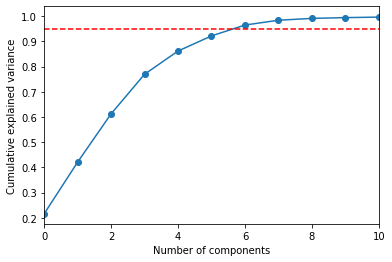

In [6]:
pca = PCA().fit(norm)
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker = "o")
plt.axhline(0.95, color = "r", linestyle = "--")
plt.xlim([0, 10])
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

We will pick 6 as the number of components for the PCA, as it is the lowest number we can choose with more than 95% cumulative explained variance.

In [7]:
#apply pca to the data
pca_components = PCA(n_components = 6).fit_transform(norm)

In [8]:
#creating a dataframe with the pca values
pca_df = pd.DataFrame(data = pca_components, columns = ["pca1", "pca2", "pca3", "pca4", "pca5", "pca6"])

The default value for the number of clusters formed in the K-Means function is eight. This might be too many clusters in our case, and it is better to estimate that optimal number of clusters, for example with the elbow curve method. We need to perform the K-Means clustering with different values of k and calculate the average distances to the group centers across all data points. Then, we plot those points and find the one where the average distance from the center falls suddenly, creating an elbow-like figure, as seen in the example below.

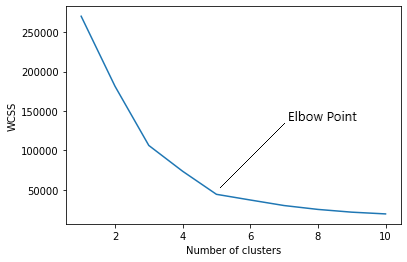

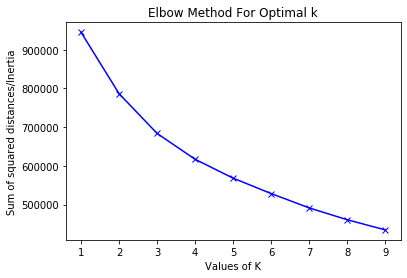

In [9]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1, 10)
for num_clusters in K :
 kmeans = KMeans(n_clusters = num_clusters, init = "random", random_state = 42)
 kmeans.fit(pca_df)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K, Sum_of_squared_distances,"bx-")
plt.xlabel("Values of K") 
plt.ylabel("Sum of squared distances/Inertia") 
plt.title("Elbow Method For Optimal k")
plt.show()

In this graph we can't tell clearly which point is the elbow, so we will use a KneeLocator to pinpoint it.

In [10]:
from kneed import KneeLocator
kl = KneeLocator(K, Sum_of_squared_distances, S = 1.0, curve = "convex", direction = "decreasing")
print(round(kl.elbow, 3))

4


In [11]:
from sklearn.cluster import KMeans
kmeans = KMeans(init = "random", random_state = 42, n_clusters = 4)
x = kmeans.fit(pca_df)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=4,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=42,
       tol=0.0001, verbose=0)

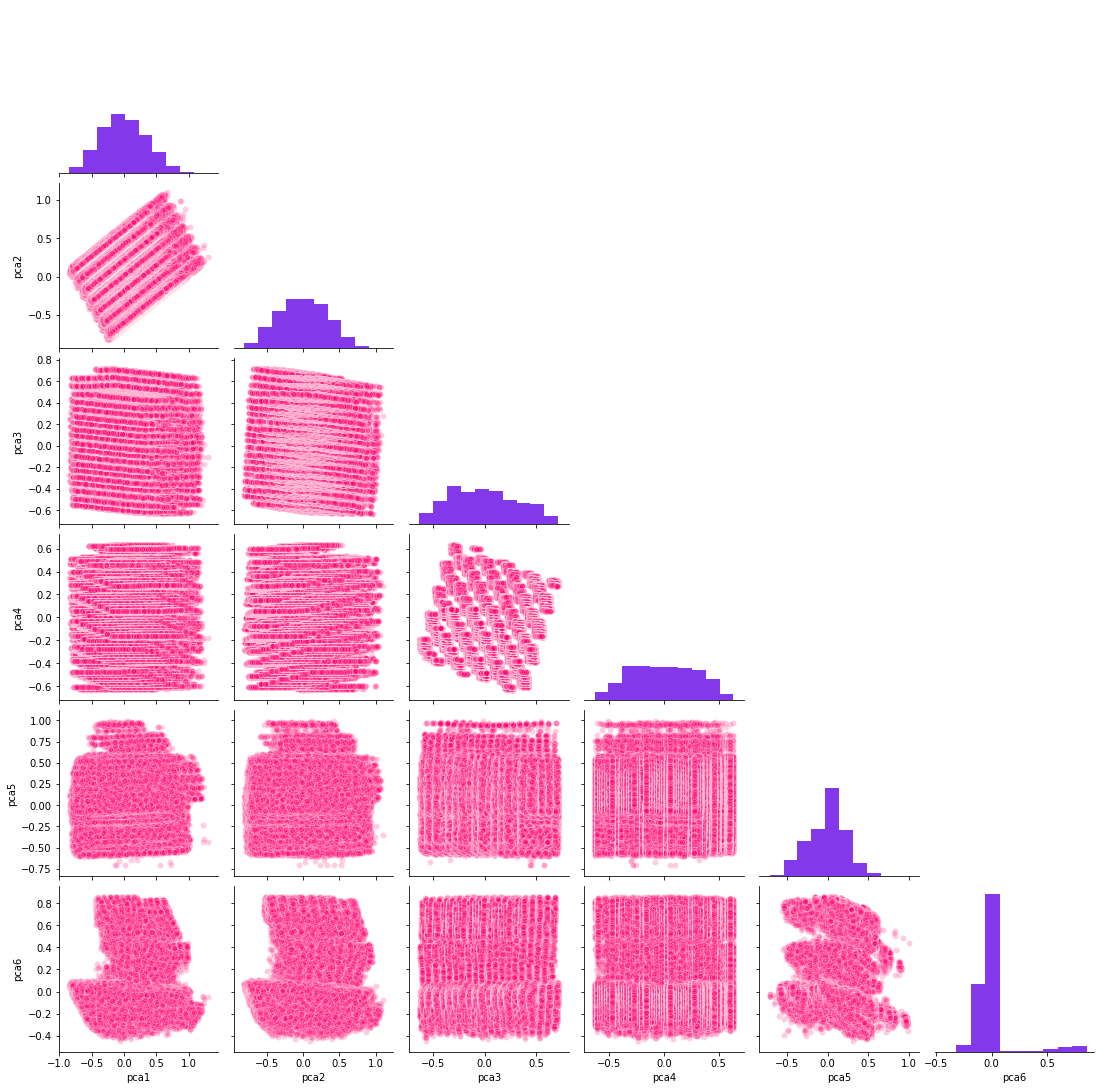

In [16]:
#matrix plot
sns.pairplot(pca_df, diag_kind = "hist", plot_kws = {"alpha":0.2, "color":"#ff006e"}, corner = True,
             diag_kws = { "color":"#8338ec"})

In [12]:
kmeans.inertia_

616845.6805825025

In [13]:
kmeans.cluster_centers_

array([[ 0.01118993, -0.39953264, -0.00571001,  0.00317416,  0.0016909 ,
         0.00806208],
       [-0.31261324,  0.11666316, -0.19190635,  0.01525883,  0.00098875,
         0.00477915],
       [-0.04144563,  0.15520014,  0.39061986, -0.03706235, -0.00115448,
        -0.00144774],
       [ 0.38603049,  0.1560561 , -0.15434759,  0.01511802, -0.00187359,
        -0.01295827]])

In [14]:
kmeans.n_iter_

45

# Exercici 2

Agrupa els vols utilitzant l'algorisme de clustering jeràrquic.

Group the flights using the hierarchical clustering algorithm.